In [1]:
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram

In [2]:
circ = QuantumCircuit(3,3)
circ.h(0)
circ.h(1)
circ.h(2)
circ.measure([0,1,2],[0,1,2])

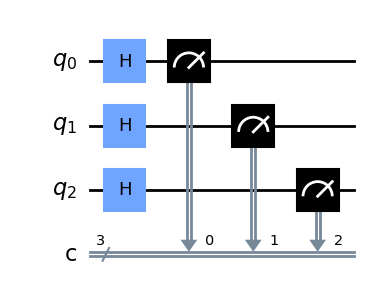

In [3]:
circ.draw('mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')

results_array = {2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

for i in range(10000):
    job = execute(circ, simulator, shots=1)
    job2 = execute(circ, simulator, shots=1)
    result = job.result().get_counts().most_frequent()
    result2 = job2.result().get_counts().most_frequent()

    while result == '111' or result == '000':
        job = execute(circ, simulator, shots=1)
        result = job.result().get_counts().most_frequent()

    while result2 == '111' or result2 == '000':
        job2 = execute(circ, simulator, shots=1)
        result2 = job2.result().get_counts().most_frequent()

    result = int(result,2) + int(result2,2)
    results_array[result] = results_array[result] + 1


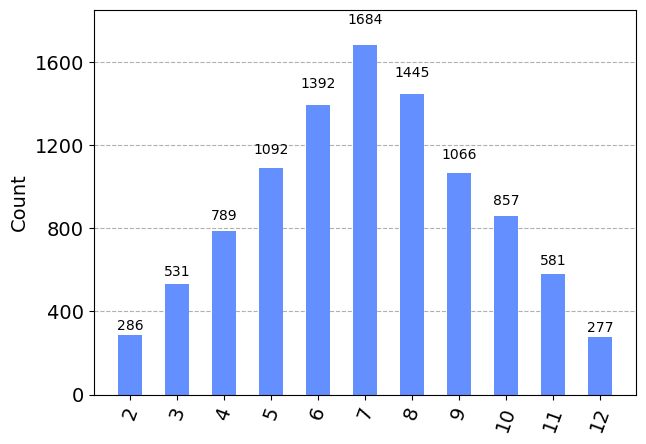

In [5]:
plot_histogram(results_array)